In [1]:
from supervenn import supervenn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
params = {'axes.labelsize': 18,'axes.titlesize':20, 'legend.fontsize': 20, 'xtick.labelsize': 28, 'ytick.labelsize': 40}
plt.rcParams.update(params)
plt.rcParams.update({'font.size': 30})

 joining curated with predicted by SSL

In [4]:
#df_lung = pd.read_csv("lung/Lung_CRISPR.csv")
#df_kid = pd.read_csv("../Survey_Methods/Sliced_Kidney_depMat.csv")
#df_lung.shape, df_kid.shape

((17453, 115), (17453, 33))

In [3]:
!ls ../

 annotation.ipynb		       clusters_Other.csv
 cell-line-selector.csv		      'clusters_Ovary_Fallopian Tube.csv'
 Clusters_AllTissues_DepMap.csv        clusters_Pancreas.csv
 Clusters_AllTissues_DepMap.csv.bak   'clusters_Peripheral Nervous System.csv'
'clusters_Ampulla of Vater.csv'        clusters_Pleura.csv
'clusters_Biliary Tract.csv'	       clusters_Prostate.csv
'clusters_Bladder_Urinary Tract.csv'   clusters_Skin.csv
 clusters_Bone.csv		      'clusters_Soft Tissue.csv'
 clusters_Bowel.csv		       clusters_Testis.csv
 clusters_Breast.csv		       clusters_Thyroid.csv
 clusters_Cervix.csv		       clusters_Uterus.csv
 clusters_CNS_Brain.csv		       clusters_Vulva_Vagina.csv
 clusters_Esophagus_Stomach.csv        CRISPRGeneEffectUncorrected.csv
 clusters_Eye.csv		       CRISPR_kidney_scores_wo_outliers.tsv
'clusters_Head and Neck.csv'	       csEG_Bone.csv
 clusters_Kidney.csv		       csEG_CNS_Brain.csv
 clusters_Liver.csv		       csEG_Liver.csv
 clusters_Lung.csv		       csEG_Lung.csv


In [4]:
def remove_string(df):
    index = df.index.tolist()
    idx = [ i.split('(', 1)[0].strip() for i in index]
    df.reset_index(drop=True)
    df2 = pd.DataFrame(df.to_numpy(), index=idx, columns=df.columns)
    return df2

clustering

In [24]:
lung = pd.read_csv("../csEG_Lung.csv", index_col=0).index.tolist()
#lung2 = remove_string(lung)
#lung_ess = lung.index[lung['0'] == 1].tolist()
#
brain = pd.read_csv("../csEG_CNS_Brain.csv", index_col=0).index.tolist()
#brain2 = remove_string(brain)
#brain_ess = brain2.index[brain2['0'] == 0].tolist()
#
bone = pd.read_csv("../csEG_Bone.csv", index_col=0).index.tolist()
#bone2 = remove_string(bone)
#bone_ess = bone2.index[bone2['0'] == 1].tolist()
#
liver = pd.read_csv("../csEG_Liver.csv", index_col=0).index.tolist()
#liver2 = remove_string(liver)
#liver_ess = liver2.index[liver2['0'] == 1].tolist()
#
##all_ts = pd.read_csv("clustering_all.csv", index_col=0)
#all2 = remove_string(all_ts)
#all_ess = all2.index[all2['0'] == 1].tolist()

In [29]:
sharma = pd.read_csv("../../../algo4EGs/goldenstandard_sets/Sharma2020_joined.csv")
sharma_ess = sharma['Gene'].tolist()
sharma_ess

['ELP3',
 'RPN1',
 'RBM25',
 'EIF2B2',
 'HIST1H2BJ',
 'SKIV2L2',
 'CSNK2B',
 'CHD4',
 'SON',
 'STX5',
 'EIF4G1',
 'PSMC4',
 'CDCA5',
 'HIST1H2BE',
 'LSM5',
 'SOD1',
 'USP5',
 'EIF4E',
 'MED20',
 'SRP54',
 'RBBP8',
 'TAF10',
 'ZC3H8',
 'NAA20',
 'BANP',
 'ZMAT2',
 'NCAPD2',
 'NCL',
 'SIN3A',
 'EIF1',
 'NUP107',
 'RBM19',
 'RPS28',
 'SMC3',
 'DNAJC9',
 'DHFR',
 'PSMD2',
 'RPL34',
 'TP53RK',
 'ATR',
 'NACA',
 'NUBP1',
 'PPP1R12A',
 'BUB1',
 'SF3A1',
 'POLR3B',
 'UBAP1',
 'HIST1H2BL',
 'SKP1',
 'PTPN11',
 'DNAJC8',
 'SEC61A1',
 'ALYREF',
 'SHFM1',
 'CCDC59',
 'COX17',
 'PPP2R3C',
 'VPS18',
 'PPP1R7',
 'DUT',
 'CDCA8',
 'BMS1',
 'RPL7A',
 'CENPE',
 'SRP68',
 'MTBP',
 'ARMC7',
 'ATP6V1H',
 'UBE2I',
 'NELFCD',
 'ACO2',
 'SNUPN',
 'AFG3L2',
 'XRN1',
 'SSB',
 'SGOL1',
 'RPAP1',
 'RRP7A',
 'CHCHD4',
 'PDAP1',
 'TOP3A',
 'PAM16',
 'TCOF1',
 'MRPL34',
 'KIF18A',
 'PPP1CB',
 'XRN2',
 'TUBGCP4',
 'AP2S1',
 'SMNDC1',
 'PRC1',
 'TRAPPC5',
 'PPP2R1A',
 'SUGP1',
 'PRPF40A',
 'RPS25',
 'RBBP5',
 'DSN1',


In [30]:
lung_set= set(lung)
brain_set= set(brain)
bone_set= set(bone)
liver_set= set(liver)
sharma_set = set(sharma_ess)
sets= [sharma_set, lung_set, brain_set, bone_set, liver_set]
labels = ['Sharma2020', 'Lung','Brain', 'Bone', 'Liver' ]

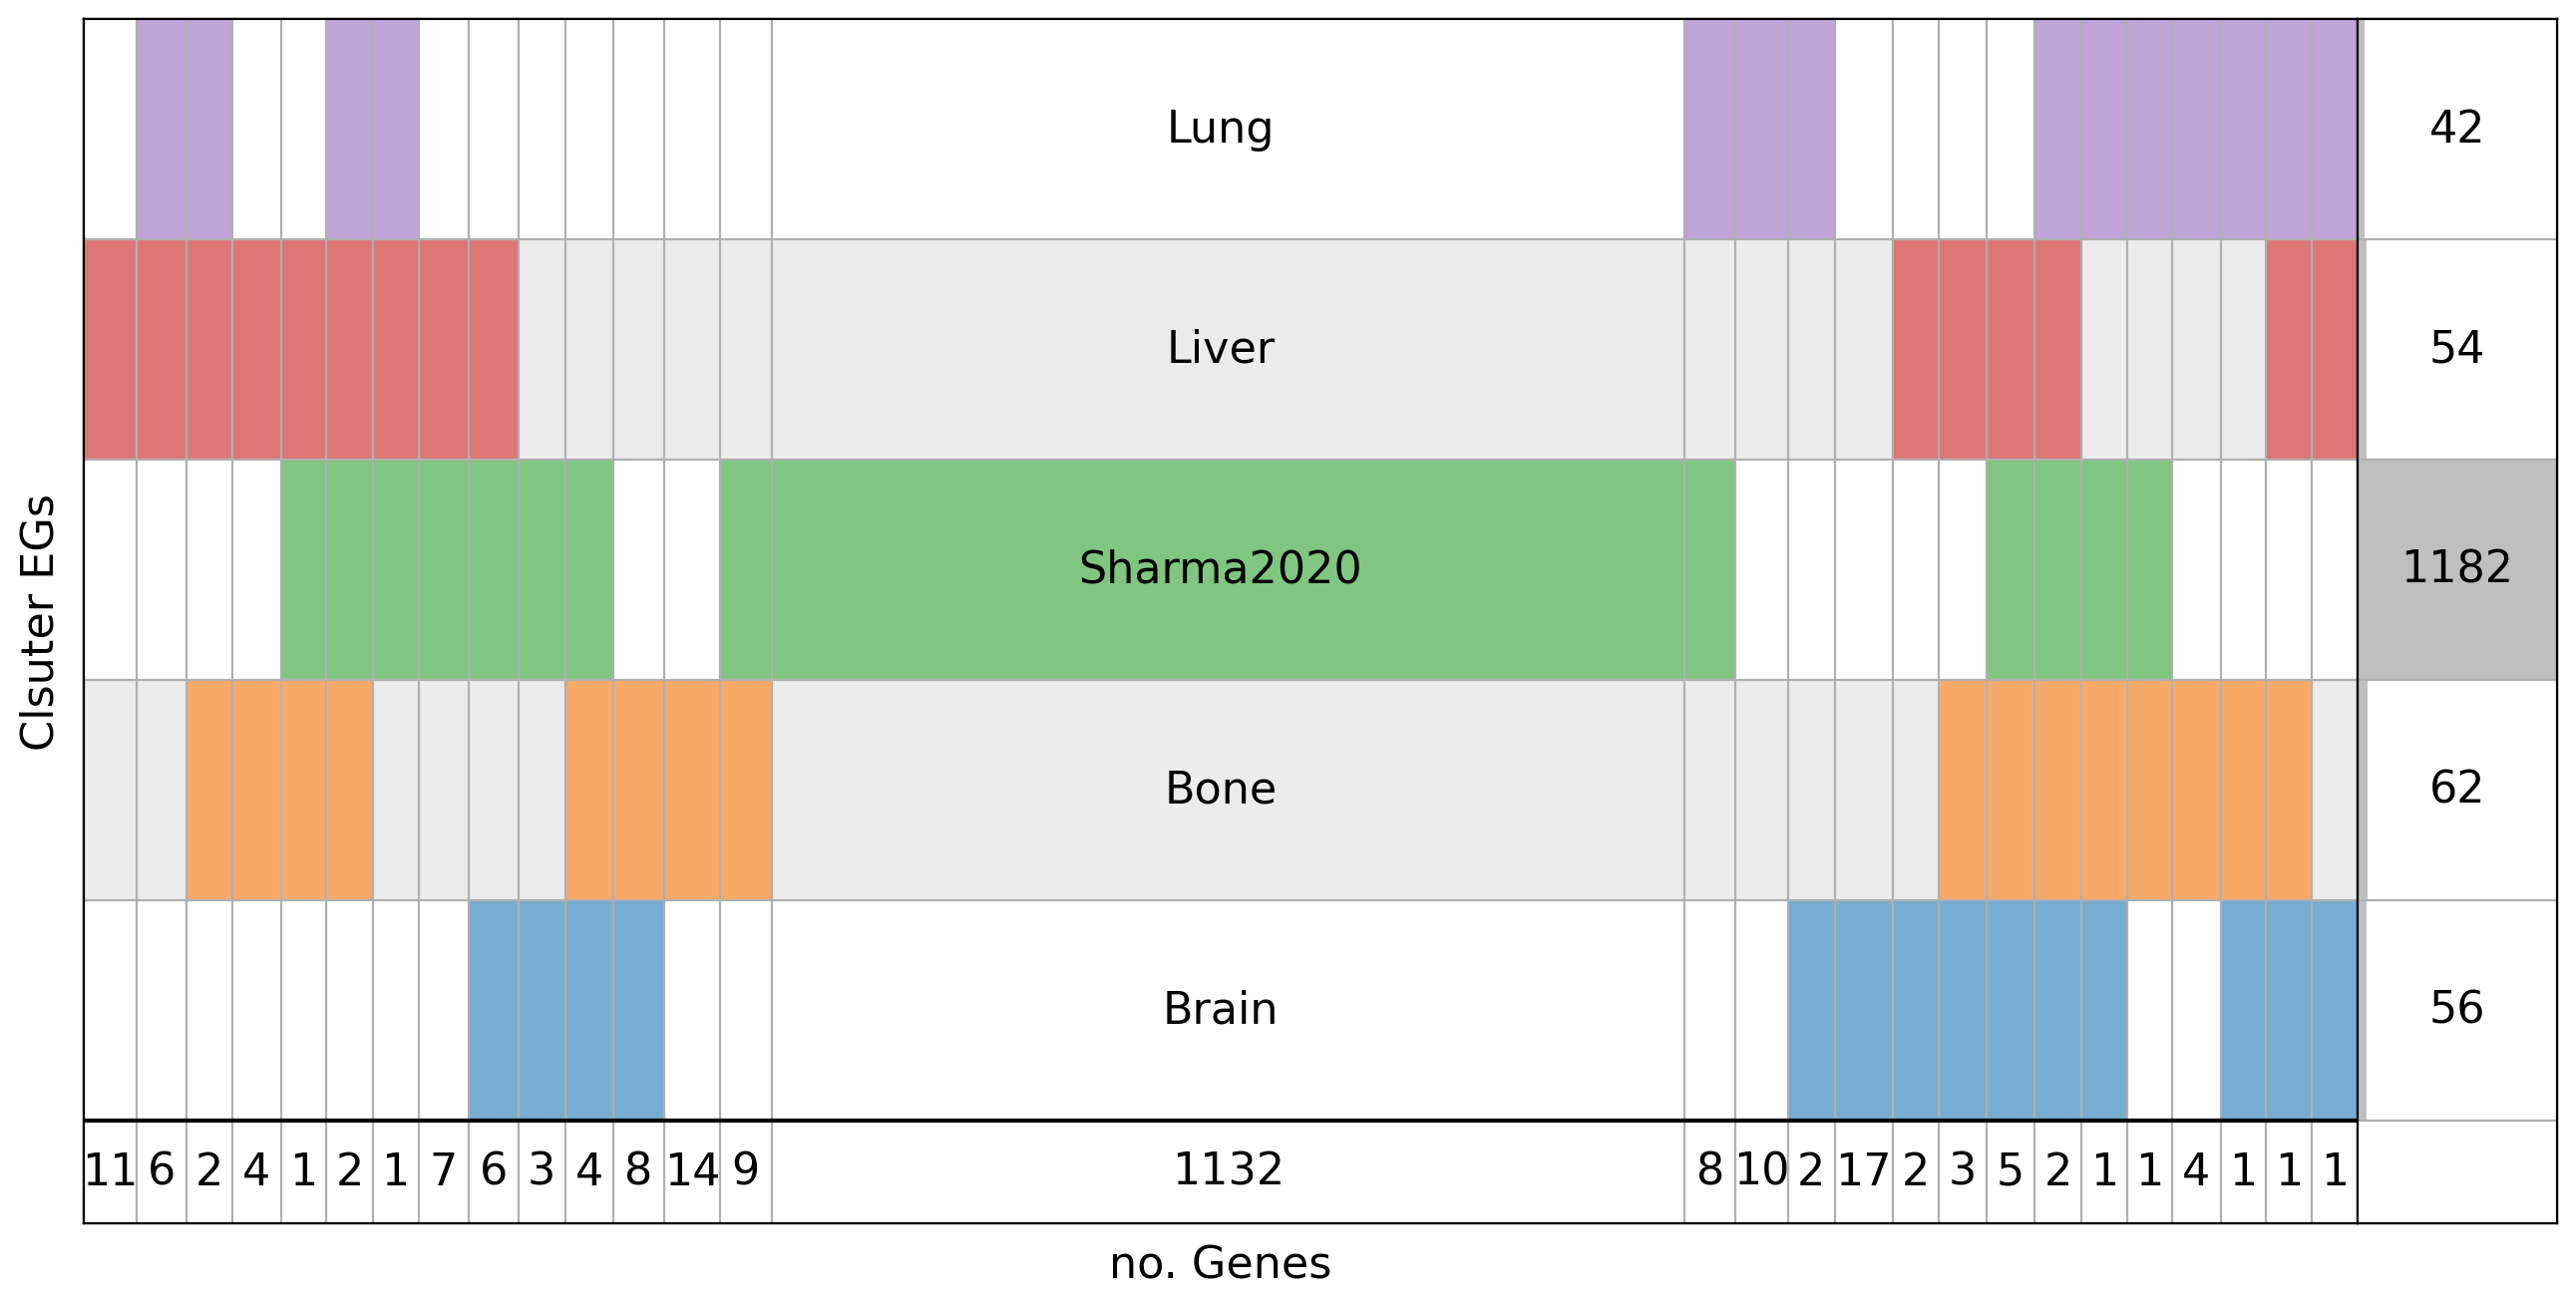

In [31]:
plt.figure(figsize=(16, 8),dpi=200)
supervenn(sets, labels, sets_ordering='minimize gaps', rotate_col_annotations=False, min_width_for_annotation=0, widths_minmax_ratio=0.05, side_plots='right', fontsize=16)
plt.xlabel('no. Genes', fontsize=16)
plt.ylabel('Clsuter EGs', fontsize=16)
#plt.ylabel('Clustering EGs', fontsize=16)
#plt.title("IQR-Processed")
#plt.savefig('Otsu_supervenn_alls.png')
plt.savefig('cluster_csEG_supervenn_sharma2020.png')

In [10]:
def common_elements(*lists):
    result = []
    for element in lists[0]:
        if all(element in sublist for sublist in lists[1:]):
            result.append(element)
    return result

def non_common_elements(*lists):
    common_set = set.intersection(*map(set, lists))
    non_common = [item for sublist in lists for item in sublist if item not in common_set]
    return non_common

In [22]:
csEG_brain = brain_set-all_set-lung_set-bone_set-liver_set
csEG_lung = lung_set-all_set-brain_set-bone_set-liver_set

In [23]:
 #pd.Series(list(lung_set-all_set-brain_set-bone_set-liver_set)).to_csv("csEG_lung_clustering.csv", index=False)
#pd.Series(list(lung_set-all_set-brain_set-bone_set-liver_set)).to_csv("csEG_lung_otsu.csv", index=False)
pd.Series(list(csEG_brain)).to_csv("csEG_brain_otsu.csv", index=False)

compare K-means vs Otsu

In [50]:
kmean = pd.read_csv("csEG_lung_clustering.csv").iloc[:,0].tolist()
otsu = pd.read_csv("csEG_lung_otsu.csv").iloc[:,0].tolist()

In [54]:
print(f' common items from Otsu/K-Means: {common_elements(kmean, otsu)}')

 common items from Otsu/K-Means: ['TRPM7', 'ANAPC15']
